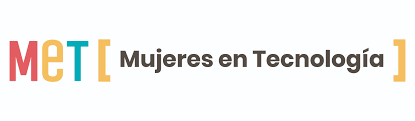

 ***METLAB-GRUPO-1***
 

 
<a id="ref7"></a>
### **Tabla de Contenido**

* <p><a href ="#ref1" > 1) Descripción del Problema </a></p>
* <p><a href ="#ref2" > 2) Descripción de los datos </a></p>
* <p><a href ="#ref3" > 3) Depuración de los datos </a></p>
* <p><a href ="#ref4" > 4) Análisis exploratorio y descriptivo</a></p>
* <p><a href ="#ref5" > 5) Modelación </a></p>
* <p><a href ="#ref6" > 6) Evaluación de Modelos </a></p>
* <p><a href ="#ref8" > 7) Conclusión</a></p>



*AGOSTO 2022*

<img src="https://m.media-amazon.com/images/I/41fl78jphsL.jpg" width=300, align ="center">

* <p><a href ="#ref7"> <font color=orange size=3> Inicio </font> </a></p>

<a id="ref1"></a>
# 1) **Descripción del Problema**



En esta competencia, su tarea es predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión de la nave espacial Titanic con la anomalía del espacio-tiempo. Para ayudarlo a hacer estas predicciones, se le da un conjunto de registros personales recuperados del sistema informático dañado de la nave.

#### ***Descripcion de archivo de Entrenamiento y Test***

El archivo ***train.csv*** esta compuesto por los registros personales de aproximadamente dos tercios alrededor de 8700 pasajeros, que se utilizarán como datos de entrenamiento.


El archivo ***test.csv*** son los registros personales para el tercio restante alrededor de 4300 pasajeros, que se utilizarán como datos de prueba.

##### *Su tarea es predecir el valor de para los pasajeros en este conjunto. Transported*

#### **Descripciones de campos**

**PassengerId** - Un ID único para cada pasajero. Cada ID toma la forma donde indica un grupo con el que viaja el pasajero y es su número dentro del grupo. Las personas en un grupo a menudo son miembros de la familia, pero no siempre. 

**HomePlanet** - El lugar del que partió el pasajero, típicamente su lugar de residencia permanente.

**CryoSleep** - Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.

**Cabin** - El número de cabina donde se aloja el pasajero. Toma la forma deck/num/side, donde side puede ser ya sea P para babor o S para estribor.

**Destination** - El planeta al que el pasajero desembarcará.

**Age** - La edad del pasajero.

**VIP** - Si el pasajero ha pagado por un servicio VIP especial durante el viaje.

**RoomService**, **FoodCourt**, **ShoppingMall,** **Spa**, **VRDeck** - Registran el monto que el pasajero a gastado en cada una de estas comodidades a las que tiene acceso, de acuerdo al villete que compro para la nave espacial Titanic.

**Name** - El nombre y apellidos del pasajero.

### **Variable Objetivo**

**Transported** - Si el pasajero fue transportado por error a otra dimensión. 0 No fue transportado, 1 Transportado. Este es el objetivo, la columna que estás tratando de predecir.

### **Descripcion de archivo Predicciones**
El resultado de las predicciones para cada pasajero, Verdadero o Falso; se cargan en el archivo ***sample_submission.csv*** que se envia a la competencia y tiene el siguiente formato

**PassengerId** - Id para cada pasajero en el conjunto de prueba.

**Transported** - El objetivo. Para cada pasajero, prediga True o False


<a id="ref2"></a>
# 2) **Descripción de los datos**

### **Librerias**

In [1]:
## Tratamiento de datos
## Tratamiento de datos
import pandas as pd
import numpy as np
# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
# Estadisticas
from scipy.stats import chi2_contingency # Probar dependencia estadistica entre variables categoricas
# Tratamientos de datos nulos
import missingno as msno
# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format # quitar notacion cientifica
# from google.colab import drive
# drive.mount('/content/drive')

## **Carga de datos**

In [2]:
df = pd.read_csv('train.csv',sep=',')

In [73]:
df.shape

(8693, 14)

Quiere decir que tenemos 8693 datos con 14 variables tomadas y la variable obejtivo o target

In [78]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


## **Exploración de datos**

Analizamos la distribución de los datos según la categoría 'Transported':

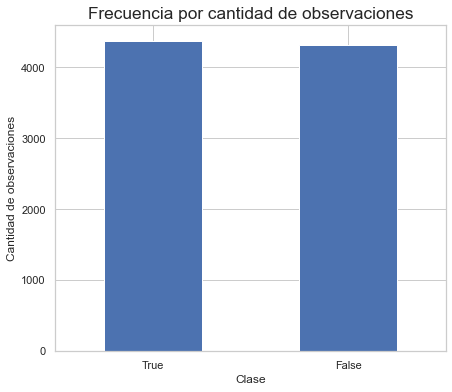

In [48]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_theme(style="whitegrid")

df['Transported'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
#sns.countplot(x='Transported', data=df, palette='hls')
plt.title("Frecuencia por cantidad de observaciones", fontsize='x-large')
plt.xlabel("Clase")
plt.ylabel("Cantidad de observaciones");
plt.show()


In [7]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [8]:
# Frecuencia relativa  
100 * df['Transported'].value_counts() / len(df['Transported'])

True    50.36
False   49.64
Name: Transported, dtype: float64

Podemos ver que las clases estan balanceadas. Es importante notar esto debido que el desbalanceo en la variable target a predecir, por lo general afecta a los algoritmos en su proceso de generalización de la información y perjudicando a las clases minoritarias.

Analizamos las principales propiedades estadísticas de todas las características cuantitativas:

In [46]:
## Principales indicadores estadisticos de las variables numericas
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


Observamos el tipo de dato dentro de cada categoría:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Se puede observar que en solo en las variables PassengerId y Transported (target) no hay valores faltantes. Es por esto que mas adelante deberemos decidir que hacer con esto.

In [13]:
variables =df.columns.tolist()
print('Variables:\n' ,variables)
print('Hay',np.count_nonzero(df.dtypes=='float64'),'variables numéricas decimales')
print('Hay',np.count_nonzero(df.dtypes=='int64'),'variables numéricas enteras')
print('Hay',np.count_nonzero(df.dtypes=='object'),'variables categóricas')
print('Hay',np.count_nonzero(df.dtypes=='bool'),'variables boleanas')

Variables:
 ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']
Hay 6 variables numéricas decimales
Hay 0 variables numéricas enteras
Hay 7 variables categóricas
Hay 1 variables boleanas


Luego, observamos distintos valores estadísticos del parámetro `Transported` del set de datos.

**MEDIA:**

In [15]:
df.groupby('Transported').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.92,389.27,382.62,167.57,564.38,543.63
True,27.75,63.10,532.69,179.83,61.68,69.15


Se puede observar una amplia diferencia entre la media de ambos grupos mayormente en los atributos: RoomService, FoodCourt, Spa y VRDeck.

**DESVÍO ESTANDAR:**

In [16]:
df.groupby('Transported').std()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,13.70,875.64,1200.12,456.53,1551.36,1563.09
True,15.15,274.81,1931.31,722.03,262.68,291.66


Se puede observar una amplia diferencia entre las desviaciones estandar de los atributos: RoomService, ShoppingMall, Spa y VRDeck.

In [25]:
#Transportados
print('Transportados:')
print('Moda de "Age":', df[df['Transported']==True]['Age'].mode()[0])
print('Moda de "RoomService":', df[df['Transported']==True]['RoomService'].mode()[0])
print('Moda de "FoodCourt":', df[df['Transported']==True]['FoodCourt'].mode()[0])
print('Moda de "ShoppingMall":', df[df['Transported']==True]['ShoppingMall'].mode()[0])
print('Moda de "Spa":', df[df['Transported']==True]['Spa'].mode()[0])
print('Moda de "VRDeck":', df[df['Transported']==True]['VRDeck'].mode()[0])

# No Transportados
print('\nTransportados:')
print('Moda de "Age":', df[df['Transported']==False]['Age'].mode()[0])
print('Moda de "RoomService":', df[df['Transported']==False]['RoomService'].mode()[0])
print('Moda de "FoodCourt":', df[df['Transported']==False]['FoodCourt'].mode()[0])
print('Moda de "ShoppingMall":', df[df['Transported']==False]['ShoppingMall'].mode()[0])
print('Moda de "Spa":', df[df['Transported']==False]['Spa'].mode()[0])
print('Moda de "VRDeck":', df[df['Transported']==False]['VRDeck'].mode()[0])

Transportados:
Moda de "Age": 18.0
Moda de "RoomService": 0.0
Moda de "FoodCourt": 0.0
Moda de "ShoppingMall": 0.0
Moda de "Spa": 0.0
Moda de "VRDeck": 0.0

Transportados:
Moda de "Age": 21.0
Moda de "RoomService": 0.0
Moda de "FoodCourt": 0.0
Moda de "ShoppingMall": 0.0
Moda de "Spa": 0.0
Moda de "VRDeck": 0.0


Gráficos sobre la distribución de datos para cada variable según Transported:

In [29]:
df_numericas = df.select_dtypes(include='number')
df_numericas

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.00,0.00,0.00,0.00,0.00,0.00
1,24.00,109.00,9.00,25.00,549.00,44.00
2,58.00,43.00,3576.00,0.00,6715.00,49.00
3,33.00,0.00,1283.00,371.00,3329.00,193.00
4,16.00,303.00,70.00,151.00,565.00,2.00
...,...,...,...,...,...,...
8688,41.00,0.00,6819.00,0.00,1643.00,74.00
8689,18.00,0.00,0.00,0.00,0.00,0.00
8690,26.00,0.00,0.00,1872.00,1.00,0.00
8691,32.00,0.00,1049.00,0.00,353.00,3235.00


Age


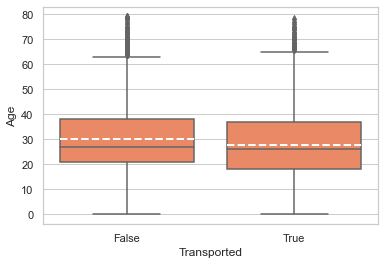

RoomService


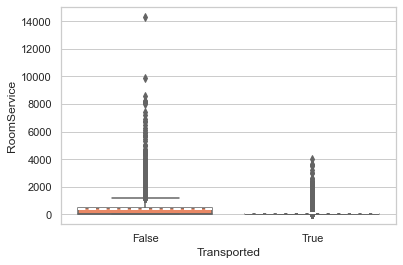

FoodCourt


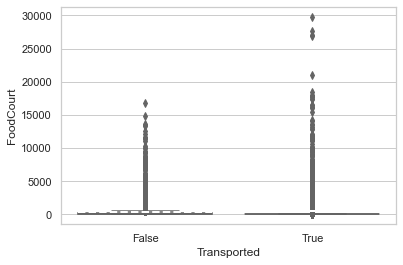

ShoppingMall


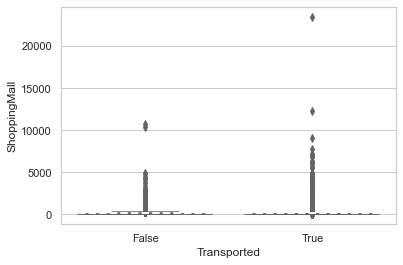

Spa


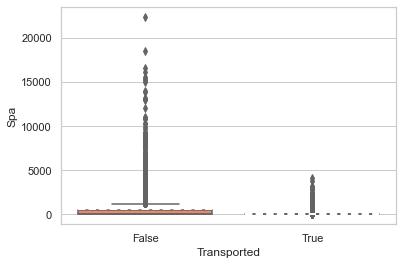

VRDeck


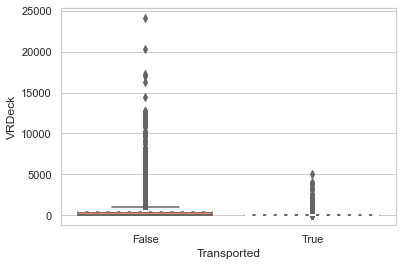

In [56]:
# Boxplot
for i in df_numericas:
    print(i)
    meanlineprops = dict(linestyle='--', linewidth=2.0, color='white')
    sns.boxplot(x = 'Transported', y = i, data=df,color='coral', showmeans = True, meanline = True, meanprops=meanlineprops)
    plt.show()

Age


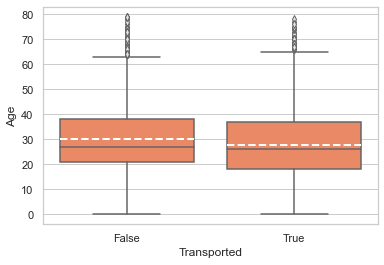

RoomService


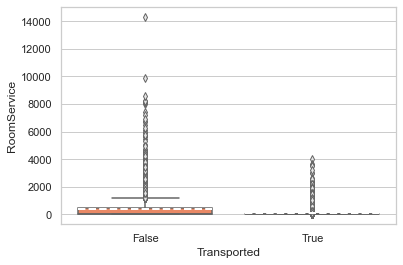

FoodCourt


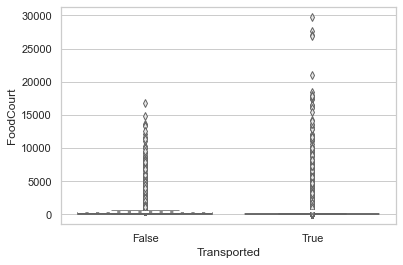

ShoppingMall


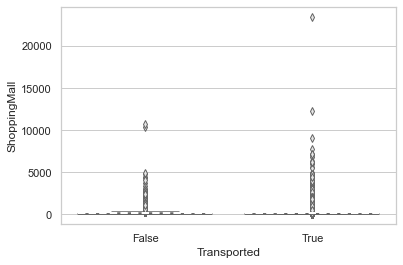

Spa


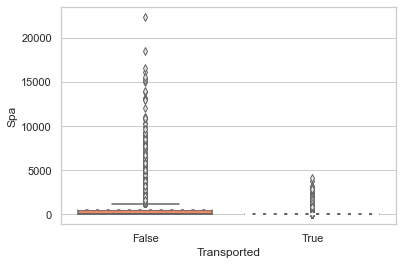

VRDeck


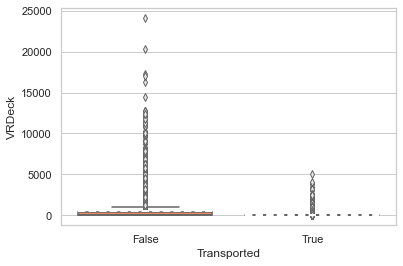

In [44]:
flierprops = dict(markerfacecolor='0.90', markersize=5,linestyle='none')
# Boxplot
for i in df_numericas:
    print(i)
    meanlineprops = dict(linestyle='--', linewidth=2.0, color='white')
    sns.boxplot(x = 'Transported', y = i, data=df,color='coral', showmeans = True, meanline = True, meanprops=meanlineprops,flierprops=flierprops)
    plt.show()

<a id="ref3"></a>
# 3) **Depuración de los datos**
* <p><a href ="#ref7"> <font color=orange size=3> Inicio </font> </a></p>

## **Valores Nulos**

Los valores ausentes son muy importantes a la hora de crear modelos, algunos algoritmos no aceptan observaciones incompletas o bien se ven muy influenciados por ellas. Aunque la imputación de valores ausentes es parte del preprocesado y, por lo tanto, debe de aprenderse únicamente con los datos de entrenamiento, su identificación se tiene que realizar antes de separar los datos para asegurar que se establecen todas las estrategias de imputación necesarias. Para efectos de este ejercicio vamos a excluir los Valores ausentes o nulos con porcentajes mayor del 20%.

In [16]:
df.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [15]:
nulos_porcentaje = (df.isna().sum())/len(df)*100
nulos_porcentaje.sort_values(ascending=False)

CryoSleep      2.50
ShoppingMall   2.39
VIP            2.34
HomePlanet     2.31
Name           2.30
Cabin          2.29
VRDeck         2.16
FoodCourt      2.11
Spa            2.11
Destination    2.09
RoomService    2.08
Age            2.06
PassengerId    0.00
Transported    0.00
dtype: float64

In [46]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isna().sum().sum()
print('Cantidad de datos ausentes:',total_missing)
# percent of data that is missing
print('Porcentaje de valores en nulo en todo el dataframe:',"{:.0%}".format(total_missing/total_cells))

Cantidad de datos ausentes: 2324
Porcentaje de valores en nulo en todo el dataframe: 2%


Podemos ver que si bien son 2324 datos incompletos representan solo un 2% del total de datos. Veamos un grafico de como estas distribuidos

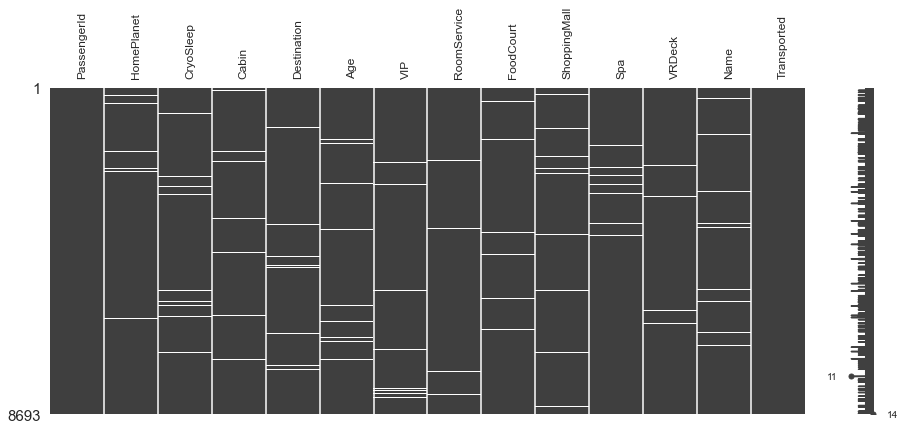

In [84]:
#usamos sample porque da error con todo el datas
ax = msno.matrix(df,figsize=(15, 6),fontsize=12)
ax.tick_params('x', rotation=90)

En este grafico podemos observar si existe sistematicidad en la perdida de datos, es decir si coinciden los "blancos" entre varias variables. Antes de tomar una decision respecto a los datos nulos, veamos como influye cada variable en la distribucion de la variable target.

Existen diferentes opciones para tratar con estos datos faltantes:
1. Eliminar valores nulos 
2. Reemplazar con el valor medio los valores nulos
3. Reemplazar con la moda los valores nulos 
4. Reemplazar con la mediana los valores nulos 


<a id="ref4"></a>
# 4) **Análisis exploratorio y descriptivo**
* <p><a href ="#ref7"> <font color=orange size=3> Inicio </font> </a></p>

In [47]:
df['Transported'] = df['Transported'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


In [87]:
# Ahora si con la función discribe miro los principales indicadores estadisticos de cada variable numerica 
#en funcion a la variable target
df.groupby('Transported')[ 'Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'].describe().T

Transported           False     True
Age          count  4226.00  4288.00
             mean     29.92    27.75
             std      13.70    15.15
             min       0.00     0.00
             25%      21.00    18.00
             50%      27.00    26.00
             75%      38.00    37.00
             max      79.00    78.00
RoomService  count  4217.00  4295.00
             mean    389.27    63.10
             std     875.64   274.81
             min       0.00     0.00
             25%       0.00     0.00
             50%       1.00     0.00
             75%     473.00     0.00
             max   14327.00  3992.00
FoodCourt    count  4231.00  4279.00
             mean    382.62   532.69
             std    1200.12  1931.31
             min       0.00     0.00
             25%       0.00     0.00
             50%       0.00     0.00
             75%     179.00     0.00
             max   16856.00 29813.00
ShoppingMall count  4221.00  4264.00
             mean    167.57   179.83
             std     456.53   722.03
             min       0.00     0.00
             25%       0.00     0.00
             50%       0.00     0.00
             75%      95.00     0.00
             max   10705.00 23492.00
Spa          count  4223.00  4287.00
             mean    564.38    61.68
             std    1551.36   262.68
             min       0.00     0.00
             25%       0.00     0.00
             50%       4.00     0.00
             75%     453.50     0.00
             max   22408.00  4103.00
VRDeck       count  4225.00  4280.00
             mean    543.63    69.15
             std    1563.09   291.66
             min       0.00     0.00
             25%       0.00     0.00
             50%       1.00     0.00
             75%     388.00     0.00
             max   24133.00  5063.00

### Edad

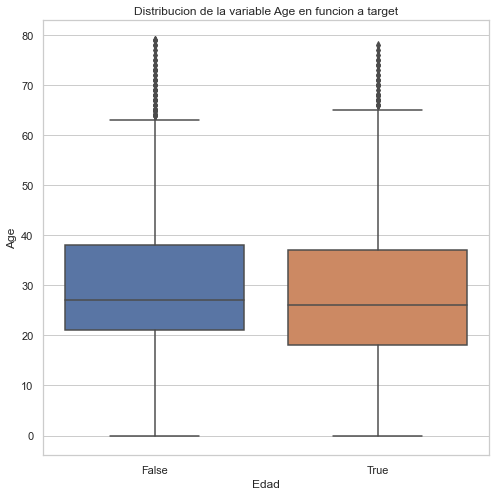

In [88]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, y='Age', x='Transported')
plt.xlabel('Edad')
plt.title('Distribucion de la variable Age en funcion a target')
plt.show()

No parece que la edad sea una variable influyente en la determinacion de si el pasajero sera trasladado o no al espacio.

Probamos transformando la variable edad a categorica.

In [89]:
def to_categorical(column, bin_size=10, min_cut=20, max_cut=70):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

In [26]:
df['Age_cat'] = to_categorical(df.Age,bin_size=10, min_cut=20, max_cut=70)
df['Age_cat'].value_counts()

[(20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 79)]


(20, 30]    2668
(30, 40]    1680
(40, 50]     994
(50, 60]     517
(60, 70]     183
(70, 79]      37
Name: Age_cat, dtype: int64

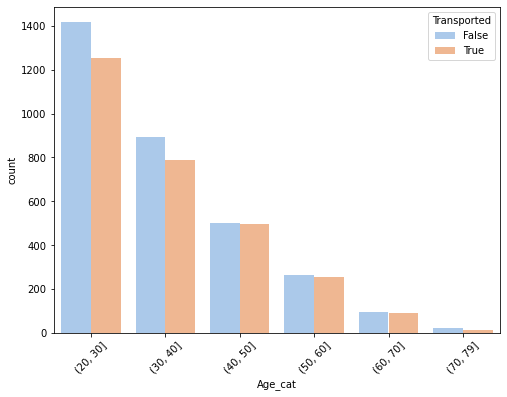

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df.Age_cat,hue=df.Transported, palette="pastel")
ax.tick_params('x', rotation=45)

Podriamos decir que entre los 20 y 40 años hay menor cantidad de pasajeros transportados, pero en muy poca cantidad, luego de ese rango etaria la proporcion es identica.

### RoomService, FoodCourt, ShoppingMall,Spa, VRDeck

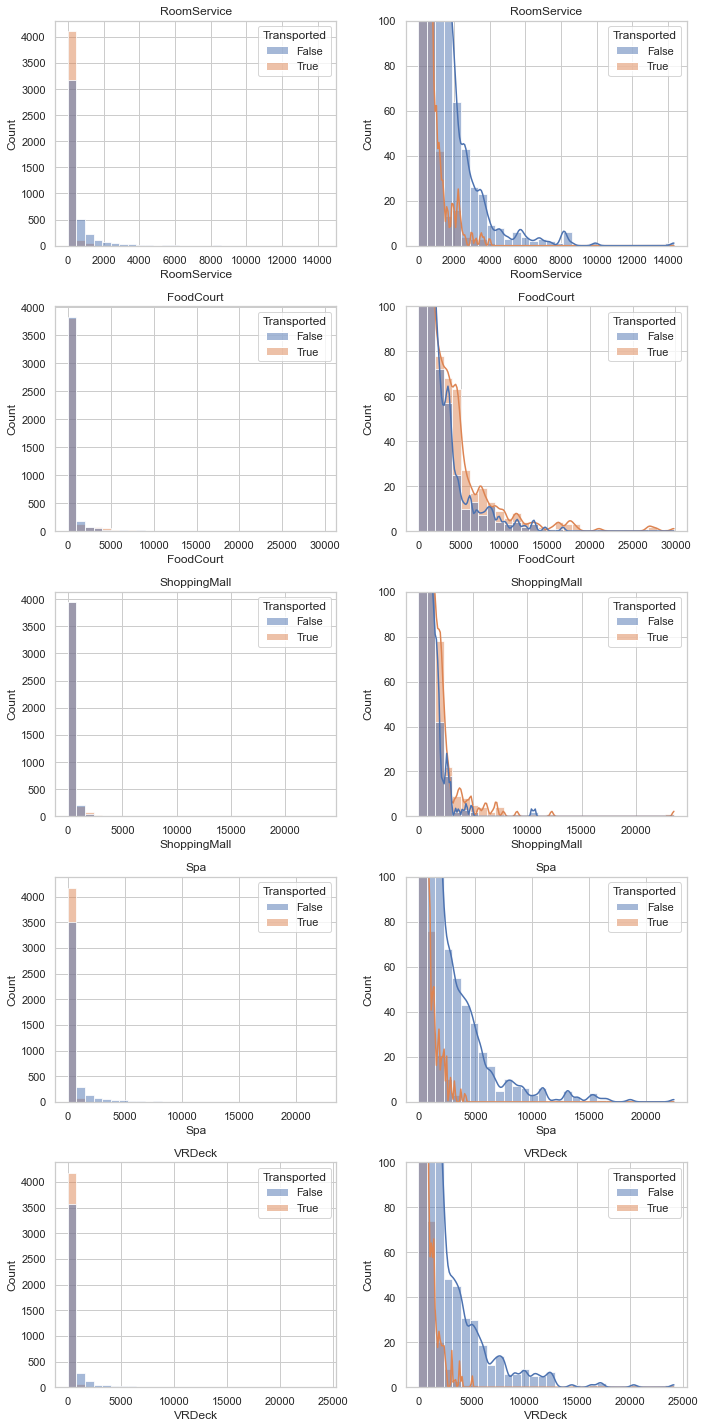

In [90]:
# Expenditure features
var_num=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(var_num):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

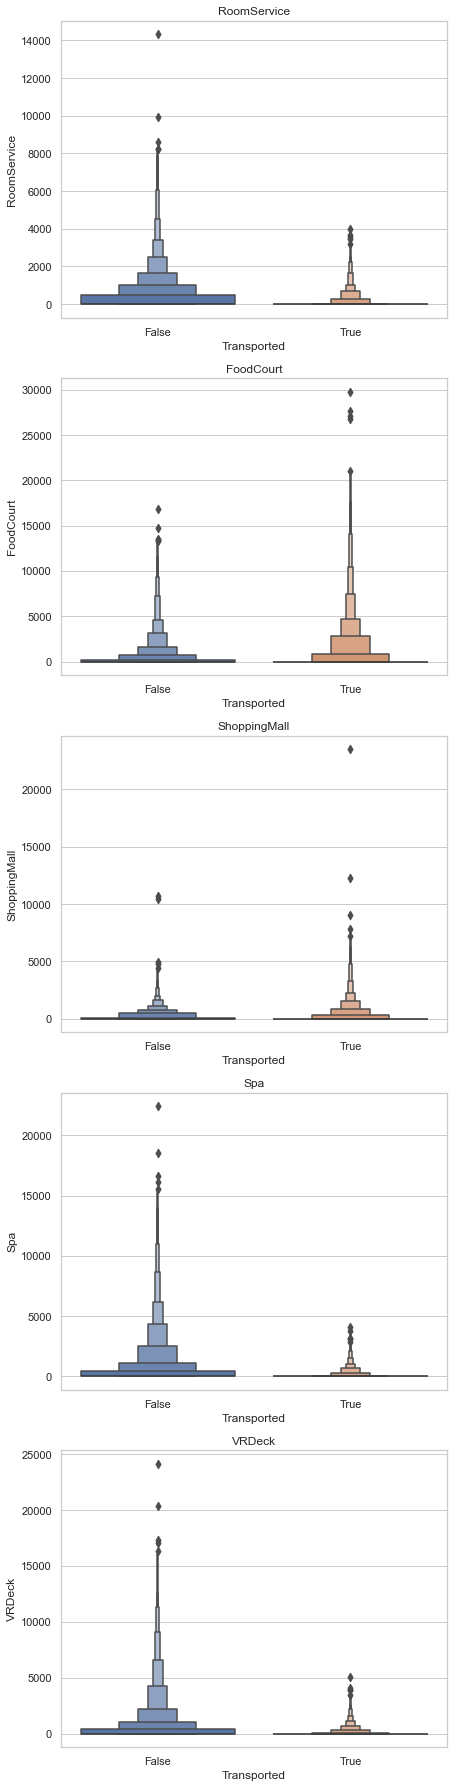

In [92]:
# Expenditure features
var_num=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(12,25))
for i, var_name in enumerate(var_num):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.boxenplot(data=df, y=var_name, axes=ax,x='Transported')
    ax.set_title(var_name)
    
fig.tight_layout()  # Improves appearance a bit
plt.show()

Pareciera que los pasajeros que no son transportados gastan mas en RoomService, Spa y VRDeck.

### HomePlanet

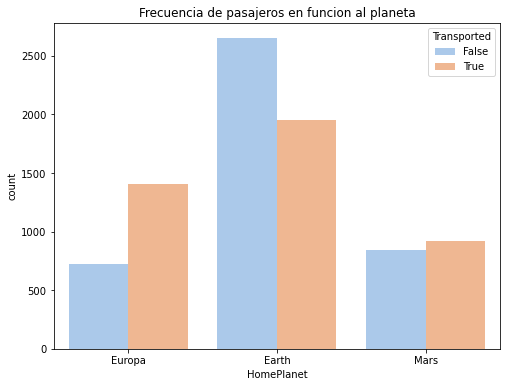

In [31]:
fig = plt.figure(figsize=(8,6))
sns.countplot(df.HomePlanet, hue=df.Transported, palette="pastel")
plt.title("Frecuencia de pasajeros en funcion al planeta")
plt.show()

Si el pasajero es de Europa hay un porcentaje mayor transportado, mientras que si viene de la tierra es menor el porcentaje de los transportados, si viene de Marte hay aproximadamente la misma cantidad de transportados y no trasnportados.

### CryoSleep

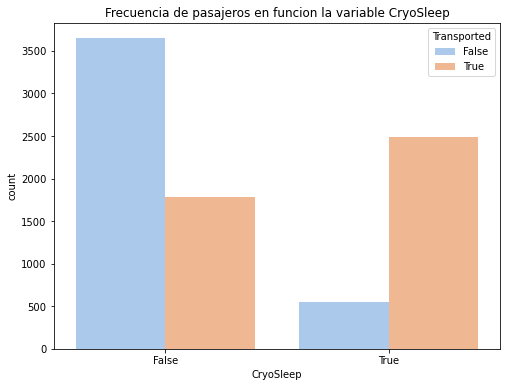

In [33]:
fig = plt.figure(figsize=(8,6))
sns.countplot(df.CryoSleep, hue=df.Transported, palette="pastel")
plt.title("Frecuencia de pasajeros en funcion la variable CryoSleep")
plt.show()

Aquellos pasajeros que eligieron entrar en suspension fueron traslados en su mayoria y viceversa, esta variable es muy influyente.

### Destination

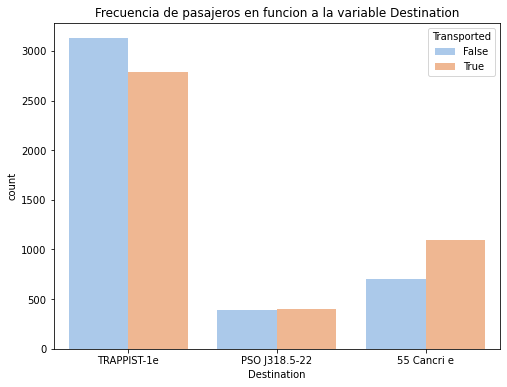

In [34]:
fig = plt.figure(figsize=(8,6))
sns.countplot(df.Destination, hue=df.Transported, palette="pastel")
plt.title("Frecuencia de pasajeros en funcion a la variable Destination")
plt.show()

### VIP

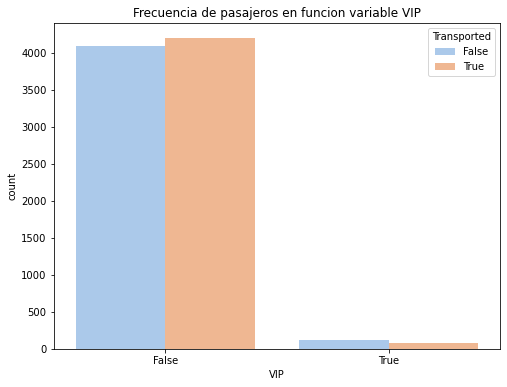

In [35]:
fig = plt.figure(figsize=(8,6))
sns.countplot(df.VIP, hue=df.Transported, palette="pastel")
plt.title("Frecuencia de pasajeros en funcion variable VIP")
plt.show()

Casi todos los pasajeros que pagaron por servicio VIP fueron traslados y los que no, no fueron traslados.

# 5) Feature engineering

A partir del id del pasajero obtener si viajo o no con la familia y analizar si esta variable influye o no

# 6) Preparado de los datos para los modelos

Aca deberiamos tomar una decision sobre los datos nulos, seleccionar variables, aplicar Onehotencoding a las variables categoricas

In [38]:
df.dtypes=='object' 

PassengerId      True
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age             False
VIP              True
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Name             True
Transported      True
Age_cat         False
dtype: bool